# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
import seaborn as se#библиотека визуализации

In [23]:
dataf = data.pivot_table(index = 'children',values = 'debt', aggfunc = ['count','sum'])# сводная таблица по количеству детей с количеством кредиторов и должнеков среди них
dataf['share_deft_group'] = dataf['sum'] / dataf['count']*100# доля должников по количеству детей в %
dataf['share_deft_sum'] = dataf['count'] / dataf['count'].sum()*100#доля от общего числа кредиторов в %
dataf

,count,sum,share_deft_group,share_deft_sum
,debt,debt,,
children,,,,
0,14107,1063,7.535266,66.081132
1,4809,444,9.232689,22.526700
2,2052,194,9.454191,9.612142
3,330,27,8.181818,1.545812
4,41,4,9.756098,0.192055
5,9,0,0.000000,0.042159


<AxesSubplot:xlabel='children', ylabel='share_deft_group'>

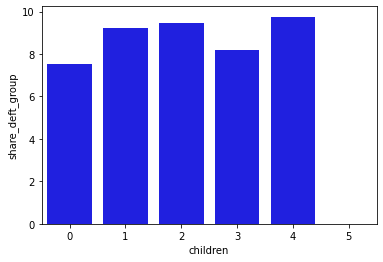

In [24]:
se.barplot( x = dataf.index, y = dataf['share_deft_group'], color='blue')


**Вывод:** 
На основании представленных данных видно, что есть зависимость между наличием задолженности и наличием детей у кредитора  - бездетные кредиторы имеют меньше задолженностей, чем кредиторы с детьми, в среднем на ~1.6%.
При этом возвращаемость кредитов от кредиторов с детьми не имеет прямой зависимости от количества детей. К тому же, в выборке данных, семьи с более чем 3мя детьми, представлены незначительной долей, что не позволяет делать обоснованных выводов, а количество должников в семьях с одним и двумя детьми отличается не существенно, хотя и присутствует рост числа должников у кредиторов с двумя детьми по сравлению с кредиторами с одним ребенком.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [25]:
datas = data.pivot_table(index = 'family_status',values = 'debt', aggfunc = ['count','sum'])# сводная таблица по семейному положению с количеством кредиторов и должнеков среди них
datas['share_deft_group'] = datas['sum'] / datas['count']*100# доля должников по семейному положению в %
datas['share_deft_sum'] = datas['count'] / datas['count'].sum()*100#доля от общего числа кредиторов в %
datas = datas.sort_values(by='share_deft_group', ascending=False)# Ваш код будет здесь. Вы можете создавать новые ячейки.
datas

,count,sum,share_deft_group,share_deft_sum
,debt,debt,,
family_status,,,,
Не женат / не замужем,2796,273,9.763948,13.097246
гражданский брак,4146,385,9.286059,19.421023
женат / замужем,12266,927,7.557476,57.457373
в разводе,1189,84,7.064760,5.569608
вдовец / вдова,951,63,6.624606,4.454750


<AxesSubplot:xlabel='share_deft_group', ylabel='family_status'>

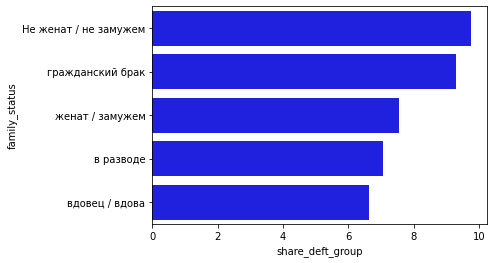

In [26]:
se.barplot( y = datas.index, x = datas['share_deft_group'], color='blue')

**Вывод:** 
На основании данных видно прямую закономерность на возвращаемость кридитов от семейного положения кредитора -  Незамужние/неженатые кредиторы и кредиторы в гражданском браке чаще являются должниками, чем официально женатые/замужние или кредиторы в разводе, вдовы/вдовцы.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [27]:
datat = data.pivot_table(index = 'total_income_category',values = 'debt', aggfunc = ['count','sum'])# сводная таблица по уровню дохода с количеством кредиторов и должнеков среди них
datat['share_deft_group'] = datat['sum'] / datat['count']*100# доля должников по доходу в %
datat['share_deft_sum'] = datat['count'] / datat['count'].sum()*100#доля от общего числа кредиторов в %
datat# 

,count,sum,share_deft_group,share_deft_sum
,debt,debt,,
total_income_category,,,,
A,25,2,8.000000,0.117107
B,5014,354,7.060231,23.486978
C,15938,1353,8.489145,74.658048
D,349,21,6.017192,1.634814
E,22,2,9.090909,0.103054


<AxesSubplot:xlabel='share_deft_group', ylabel='total_income_category'>

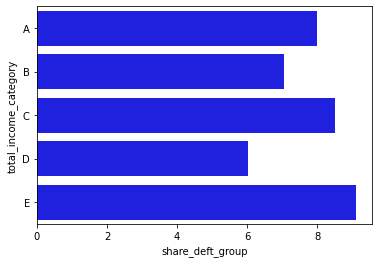

In [28]:
se.barplot( y = datat.index, x = datat['share_deft_group'], color='blue')

**Вывод:** 
Основная доля кредитов берется людьми в доходной группе B (23,5%) и C (74,7%), остальные группы представлены незначительно, поэтому обобщить выводы по всем доходным группам невозможно. Однако, если сравнивать только категории В и С, то видно что в  более высокой доходной группе В кредиторов с задолженностью меньше на 1,5% чем в С.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [29]:
datap = data.pivot_table(index = 'purpose_category',values = 'debt', aggfunc = ['count','sum'])# сводная таблица по цели кридита с количеством кредиторов и должнеков среди них
datap['share_deft_group'] = datap['sum'] / datap['count']*100# доля должников по цели кридита в %
datap['share_deft_sum'] = datap['count'] / datap['count'].sum()*100#доля от общего числа кредиторов в %
datap = datap.sort_values(by='share_deft_group', ascending=False)
datap

,count,sum,share_deft_group,share_deft_sum
,debt,debt,,
purpose_category,,,,
операции с автомобилем,4281,400,9.343611,20.053401
получение образования,3989,369,9.250439,18.685591
проведение свадьбы,2324,183,7.874355,10.886266
операции с недвижимостью,10754,780,7.253115,50.374742


<AxesSubplot:xlabel='share_deft_group', ylabel='purpose_category'>

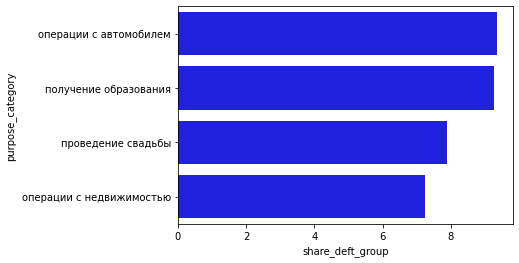

In [30]:
se.barplot( y = datap.index, x = datap['share_deft_group'], color='blue')

**Вывод:** 
Кредиты на 'операции с автомобилем' и 'получение образования' оказались схожими по доли должников (~9.3%), однако, наибольшая кредитная группа 'операции с недвижимостью' (50% от общего числа кредитов) оказалась с наименьшей долей невозвратов (7.3%)

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* 
Наиболее распространенной причиной пропусков и аномалий в исходных данных является человеческий фактор, одним из решений может быть уменьшение ручного ввода - для этого можно использовать прописанные категори. 
Также пропуски в данных могут быть из-за ошибок при выгрузки данных из БД, но такие пропуски как правило имеют явные закономерности - например, отсутствие значений по всему столбцу или значений с одним общим признаком

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* 
Количественные данные лучше заменять на медианные значения, так как медиана исключает аномальные значения, которые могут повлиять на расчет среднего.

In [31]:
#сводная таблица по семейному положению, количеству детей, целям кредита и доходной группе
datao = data.pivot_table(index = ['family_status','purpose_category','total_income_category','children'],values = 'debt', aggfunc = ['count','sum'])# сводная таблица по семейному положению с количеством кредиторов и должнеков среди них
datao['share_deft_group'] = datao['sum'] / datao['count']*100# доля должников по группе в %
datao['share_deft_sum'] = datao['count'] / datao['count'].sum()*100#доля от общего числа кредиторов в %
datao = datao.sort_values(by='share_deft_sum', ascending=False)# Ваш код будет здесь. Вы можете создавать новые ячейки.
datao.head(10)

count  \
                                                                               debt   
family_status         purpose_category         total_income_category children         
женат / замужем       операции с недвижимостью C                     0         3145   
                                                                     1         1255   
                      операции с автомобилем   C                     0         1233   
                      получение образования    C                     0         1183   
гражданский брак      проведение свадьбы       C                     0         1163   
женат / замужем       операции с недвижимостью B                     0          999   
Не женат / не замужем операции с недвижимостью C                     0          955   
женат / замужем       операции с недвижимостью C                     2          633   
гражданский брак      операции с недвижимостью C                     0          492   
женат / замужем       операции с автомобилем   C                     1          487   

                                                                               sum  \
                                                                              debt   
family_status         purpose_category         total_income_category children        
женат / замужем       операции с недвижимостью C                     0         212   
                                                                     1          91   
                      операции с автомобилем   C                     0          86   
                      получение образования    C                     0          97   
гражданский брак      проведение свадьбы       C                     0          92   
женат / замужем       операции с недвижимостью B                     0          62   
Не женат / не замужем операции с недвижимостью C                     0          71   
женат / замужем       операции с недвижимостью C                     2          58   
гражданский брак      операции с недвижимостью C                     0          42   
женат / замужем       операции с автомобилем   C                     1          51   

                                                                              share_deft_group  \
                                                                                                 
family_status         purpose_category         total_income_category children                    
женат / замужем       операции с недвижимостью C                     0                6.740859   
                                                                     1                7.250996   
                      операции с автомобилем   C                     0                6.974858   
                      получение образования    C                     0                8.199493   
гражданский брак      проведение свадьбы       C                     0                7.910576   
женат / замужем       операции с недвижимостью B                     0                6.206206   
Не женат / не замужем операции с недвижимостью C                     0                7.434555   
женат / замужем       операции с недвижимостью C                     2                9.162717   
гражданский брак      операции с недвижимостью C                     0                8.536585   
женат / замужем       операции с автомобилем   C                     1               10.472279   

                                                                              share_deft_sum  
                                                                                              
family_status         purpose_category         total_income_category children                 
женат / замужем       операции с недвижимостью C                     0             14.732059  
                                                                     1              5.878771  
                      операции с автомобилем   C                     0       

In [32]:
mean_share_deft_group = data['debt'].sum()/data['debt'].count()*100# доля должников от общего числа кредиторов в %
mean_share_deft_group

8.113172194116546

## Общий вывод.

Делать выводы по возвращаемости кредитов на основании только одного параметра было бы неправильно, так как некоторые группы существенно отличаются по доли кредиторов в них от наиболее востребованных, но можно объединять параметры, чтобы получить более мелкие группы которые уже можно было бы сравнивать между собой. Так же для более качественных выводов следует добавить в данные суммы кредитов - чтобы более полно оценивать риски по должникам.
Так на основании представленных данных можно сделать выводы:
- что чаще всего берут кредиты люди в браке, на недвижимость, в средней доходной группе С, не имеющие детей и доля невозвратов в этой категории меньше средней на 1,3%
- автокредиты и кредиты на образование более рискованные и невозвратные чем другие категории по целям кредита
- кредит берут чаще всего на операции с недвижимостью
- наибольшей популярностью кредиты пользуются в доходных группах B и С (доход от 50 000 до 1 000 000 рублей)кредиторы из категории С хуже возвращают кредиты
- кредиты чаще берут бездетные люди в категории количество детей и семейные люди в категории семейное положение
- кредиторы с детьми чаще имеют задолженность по кредиту, но количество детей не сильно влияет на долю должников.
- люди в браке реже имеют долги по кредиту чем кредиторы в гражданском браке и незамужние в среднем на 2%